In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Social_Network_Ad.csv')

In [3]:
del df['User ID']

In [4]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
df = pd.get_dummies(df, drop_first = True)

In [6]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [7]:
X = df.loc[:,['Age','EstimatedSalary','Gender_Male']]

In [8]:
Y = df.loc[:,['Purchased']].values

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
x = sc.fit_transform(X)

In [12]:
x

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [13]:
Y = Y.reshape(-1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_tr,X_ts,Y_tr,Y_ts=train_test_split(x,Y, random_state =10, test_size = 0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
acc_value=[]
err_value=[]

In [18]:
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors= k)
    model.fit(X_tr,Y_tr)
    Y_Prediction=model.predict(X_ts)
    accuracy = accuracy_score(Y_ts,Y_Prediction)
    acc_value.append(accuracy)
    err_value.append(1-accuracy)

In [19]:
import matplotlib.pyplot as plt

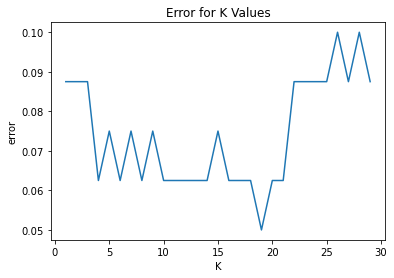

In [20]:
plt.plot(range(1,30),err_value)
plt.title('Error for K Values')
plt.xlabel('K')
plt.ylabel('error')
plt.show()